In [141]:
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
programs = ["Informatique"]
years = ["2007-2008", "2008-2009", "2009-2010", "2010-2011", "2011-2012", "2012-2013",
         "2013-2014", "2014-2015", "2015-2016", "2016-2017"]
bachelor_semesters = ["Bachelor semestre 1", "Bachelor semestre 2", "Bachelor semestre 3", "Bachelor semestre 4",
                     "Bachelor semestre 5", "Bachelor semestre 6"]
master_semesters = ["Master semestre 1", "Master semestre 2", "Master semestre 3", "Projet Master automne", 
                   "Projet Master printemps"]

In [3]:
report_model_param = "133685247"
base_url = "http://isa.epfl.ch/imoniteur_ISAP/!GEDPUBLICREPORTS"
r = requests.get(base_url+".filter", params = {"ww_i_reportModel": report_model_param})
form = BeautifulSoup(r.text, 'html.parser')
b_list_param = form.find_all("input", attrs={"name":"ww_b_list"})[0]['value']
report_model_xsl_param = form.find_all("input", attrs={"name":"ww_i_reportModelXsl"})[0]['value']

In [4]:
program_values = {}
for program in programs:
    program_values[program] = form.find_all("option", string=program)[0]['value']

In [5]:
year_values = {}
for year in years:
    year_values[year] = form.find_all("option", string=year)[0]['value']

In [6]:
bachelor_semester_values = {}
for semester in bachelor_semesters:
    bachelor_semester_values[semester] = form.find_all("option", string=semester)[0]['value']

In [7]:
master_semester_values = {}
for semester in master_semesters:
    master_semester_values[semester] = form.find_all("option", string=semester)[0]['value']

In [8]:
def get_dataset(prog_val, y_val, sem_val):
    params = {"ww_i_reportModel": report_model_param, 
              "ww_b_list": b_list_param, 
              "ww_i_reportModelXsl": report_model_xsl_param, 
              "ww_x_UNITE_ACAD": prog_val,
              "ww_x_PERIODE_ACAD": y_val,
              "ww_x_PERIODE_PEDAGO": sem_val}
    r = requests.get(base_url+".filter", params = params)
    set_page = BeautifulSoup(r.text, 'html.parser')
    gps_string = set_page.find_all("a", attrs={"class": "ww_x_GPS"})[1]["onclick"]
    gps_value = ''.join(list(filter(str.isdigit, gps_string)))
    params = {"ww_i_reportModel": report_model_param, 
              "ww_i_reportModelXsl": report_model_xsl_param,
              "ww_x_GPS": gps_value}
    r = requests.get(base_url+".html", params = params)
    res=pd.read_html(r.text, skiprows = [0], header = 0, index_col = "Nom Prénom")
    if len(res):
        return res[0].drop("Unnamed: 11", axis=1)
    else:
        return pd.DataFrame(columns = ['Civilité', 'Orientation Bachelor', 'Orientation Master', 
                                       'Spécialisation', 'Filière opt.', 'Mineur', 'Statut', 'Type Echange', 
                                       'Ecole Echange', 'No Sciper'])

In [9]:
bachelor_datasets = {}
for year in years:
    bachelor_datasets[year] = {}
for year in years:
    for semester in bachelor_semesters:
        print(year, semester)
        bachelor_datasets[year][semester] = get_dataset(program_values[programs[0]], 
                                                        year_values[year], bachelor_semester_values[semester])


2007-2008 Bachelor semestre 1
2007-2008 Bachelor semestre 2
2007-2008 Bachelor semestre 3
2007-2008 Bachelor semestre 4
2007-2008 Bachelor semestre 5
2007-2008 Bachelor semestre 6
2008-2009 Bachelor semestre 1
2008-2009 Bachelor semestre 2
2008-2009 Bachelor semestre 3
2008-2009 Bachelor semestre 4
2008-2009 Bachelor semestre 5
2008-2009 Bachelor semestre 6
2009-2010 Bachelor semestre 1
2009-2010 Bachelor semestre 2
2009-2010 Bachelor semestre 3
2009-2010 Bachelor semestre 4
2009-2010 Bachelor semestre 5
2009-2010 Bachelor semestre 6
2010-2011 Bachelor semestre 1
2010-2011 Bachelor semestre 2
2010-2011 Bachelor semestre 3
2010-2011 Bachelor semestre 4
2010-2011 Bachelor semestre 5
2010-2011 Bachelor semestre 6
2011-2012 Bachelor semestre 1
2011-2012 Bachelor semestre 2
2011-2012 Bachelor semestre 3
2011-2012 Bachelor semestre 4
2011-2012 Bachelor semestre 5
2011-2012 Bachelor semestre 6
2012-2013 Bachelor semestre 1
2012-2013 Bachelor semestre 2
2012-2013 Bachelor semestre 3
2012-2013 

In [10]:
for year in years:
    for semester in bachelor_semesters:
        print(year, semester, bachelor_datasets[year][semester].shape)

2007-2008 Bachelor semestre 1 (90, 10)
2007-2008 Bachelor semestre 2 (72, 10)
2007-2008 Bachelor semestre 3 (50, 10)
2007-2008 Bachelor semestre 4 (48, 10)
2007-2008 Bachelor semestre 5 (48, 10)
2007-2008 Bachelor semestre 6 (38, 10)
2008-2009 Bachelor semestre 1 (96, 10)
2008-2009 Bachelor semestre 2 (74, 10)
2008-2009 Bachelor semestre 3 (53, 10)
2008-2009 Bachelor semestre 4 (51, 10)
2008-2009 Bachelor semestre 5 (57, 10)
2008-2009 Bachelor semestre 6 (51, 10)
2009-2010 Bachelor semestre 1 (117, 10)
2009-2010 Bachelor semestre 2 (101, 10)
2009-2010 Bachelor semestre 3 (54, 10)
2009-2010 Bachelor semestre 4 (52, 10)
2009-2010 Bachelor semestre 5 (75, 10)
2009-2010 Bachelor semestre 6 (60, 10)
2010-2011 Bachelor semestre 1 (153, 10)
2010-2011 Bachelor semestre 2 (125, 10)
2010-2011 Bachelor semestre 3 (51, 10)
2010-2011 Bachelor semestre 4 (51, 10)
2010-2011 Bachelor semestre 5 (62, 10)
2010-2011 Bachelor semestre 6 (52, 10)
2011-2012 Bachelor semestre 1 (166, 10)
2011-2012 Bachelor s

In [11]:
master_datasets = {}
for year in years:
    master_datasets[year] = {}
for year in years:
    for semester in master_semesters:
        print(year, semester)
        master_datasets[year][semester] = get_dataset(program_values[programs[0]], 
                                                        year_values[year], master_semester_values[semester])

2007-2008 Master semestre 1
2007-2008 Master semestre 2
2007-2008 Master semestre 3
2007-2008 Projet Master automne
2007-2008 Projet Master printemps
2008-2009 Master semestre 1
2008-2009 Master semestre 2
2008-2009 Master semestre 3
2008-2009 Projet Master automne
2008-2009 Projet Master printemps
2009-2010 Master semestre 1
2009-2010 Master semestre 2
2009-2010 Master semestre 3
2009-2010 Projet Master automne
2009-2010 Projet Master printemps
2010-2011 Master semestre 1
2010-2011 Master semestre 2
2010-2011 Master semestre 3
2010-2011 Projet Master automne
2010-2011 Projet Master printemps
2011-2012 Master semestre 1
2011-2012 Master semestre 2
2011-2012 Master semestre 3
2011-2012 Projet Master automne
2011-2012 Projet Master printemps
2012-2013 Master semestre 1
2012-2013 Master semestre 2
2012-2013 Master semestre 3
2012-2013 Projet Master automne
2012-2013 Projet Master printemps
2013-2014 Master semestre 1
2013-2014 Master semestre 2
2013-2014 Master semestre 3
2013-2014 Projet

In [12]:
for year in years:
    for semester in master_semesters:
        print(year, semester, master_datasets[year][semester].shape)

2007-2008 Master semestre 1 (71, 10)
2007-2008 Master semestre 2 (87, 10)
2007-2008 Master semestre 3 (65, 10)
2007-2008 Projet Master automne (1, 10)
2007-2008 Projet Master printemps (6, 10)
2008-2009 Master semestre 1 (60, 10)
2008-2009 Master semestre 2 (64, 10)
2008-2009 Master semestre 3 (48, 10)
2008-2009 Projet Master automne (4, 10)
2008-2009 Projet Master printemps (6, 10)
2009-2010 Master semestre 1 (52, 10)
2009-2010 Master semestre 2 (62, 10)
2009-2010 Master semestre 3 (34, 10)
2009-2010 Projet Master automne (3, 10)
2009-2010 Projet Master printemps (8, 10)
2010-2011 Master semestre 1 (96, 10)
2010-2011 Master semestre 2 (109, 10)
2010-2011 Master semestre 3 (40, 10)
2010-2011 Projet Master automne (3, 10)
2010-2011 Projet Master printemps (7, 10)
2011-2012 Master semestre 1 (102, 10)
2011-2012 Master semestre 2 (123, 10)
2011-2012 Master semestre 3 (67, 10)
2011-2012 Projet Master automne (9, 10)
2011-2012 Projet Master printemps (13, 10)
2012-2013 Master semestre 1 (88

In [41]:
sem_1 = 'Bachelor semestre 1'
sem_5 = 'Bachelor semestre 5'
sem_6 = 'Bachelor semestre 6'
bachelor_sem1 = pd.DataFrame()
bachelor_sem5 = pd.DataFrame()
bachelor_sem6 = pd.DataFrame()
for y in years:
    
    with_years = bachelor_datasets[y][sem_1].copy()
    with_years['Years'] = pd.Series([y]*with_years.shape[0], index=with_years.index)
    bachelor_sem1=bachelor_sem1.append(with_years)
    
    with_years = bachelor_datasets[y][sem_5].copy()
    with_years['Years'] = pd.Series([y]*with_years.shape[0], index=with_years.index)
    bachelor_sem5=bachelor_sem5.append(with_years)
                             
    with_years = bachelor_datasets[y][sem_6].copy()
    with_years['Years'] = pd.Series([y]*with_years.shape[0], index=with_years.index)
    bachelor_sem6=bachelor_sem6.append(with_years) 
                             
graduated_students = pd.DataFrame()
for index, row in bachelor_sem1.iterrows():
    if bachelor_sem5['No Sciper'].isin([row['No Sciper']]).values.any() & bachelor_sem6['No Sciper'].isin([row['No Sciper']]).values.any():
        graduated_students=graduated_students.append(row)
del (graduated_students['Years'])
print (graduated_students.head())

                       Civilité  Ecole Echange  Filière opt.  Mineur  \
Arévalo Christian      Monsieur            NaN           NaN     NaN   
Aubelle Flavien        Monsieur            NaN           NaN     NaN   
Baeriswyl Jonathan     Monsieur            NaN           NaN     NaN   
Barroco Michael        Monsieur            NaN           NaN     NaN   
Bindschaedler Vincent  Monsieur            NaN           NaN     NaN   

                       No Sciper  Orientation Bachelor  Orientation Master  \
Arévalo Christian       169569.0                   NaN                 NaN   
Aubelle Flavien         174905.0                   NaN                 NaN   
Baeriswyl Jonathan      179406.0                   NaN                 NaN   
Barroco Michael         179428.0                   NaN                 NaN   
Bindschaedler Vincent   179449.0                   NaN                 NaN   

                       Spécialisation   Statut  Type Echange  
Arévalo Christian                 N

In [57]:
graduated_students.drop_duplicates('No Sciper', inplace=True)
months = [0]*len(graduated_students['No Sciper'])
for ind, sciper in enumerate(graduated_students['No Sciper']):
    years_6sem = np.where(bachelor_sem6['No Sciper'] == sciper)
    years_5sem = np.where(bachelor_sem5['No Sciper'] == sciper)
    finish_year_6 = bachelor_sem6['Years'].ix[years_6sem[0][len(years_6sem[0])-1]]
    finish_year_5 = bachelor_sem5['Years'].ix[years_5sem[0][len(years_5sem[0])-1]]
    years_1sem = np.where(bachelor_sem1['No Sciper'] == sciper)
    beginning_year = bachelor_sem1['Years'].ix[years_1sem[0][0]]
    
    months[ind] =12*(int(finish_year_6[0:4]) - int (beginning_year[0:4])+1)
    if (finish_year_5>finish_year_6): months[ind] +=6
        
graduated_students['Months'] = pd.Series(months, index=graduated_students.index)
print(graduated_students.head())

                       Civilité  Ecole Echange  Filière opt.  Mineur  \
Arévalo Christian      Monsieur            NaN           NaN     NaN   
Aubelle Flavien        Monsieur            NaN           NaN     NaN   
Baeriswyl Jonathan     Monsieur            NaN           NaN     NaN   
Barroco Michael        Monsieur            NaN           NaN     NaN   
Bindschaedler Vincent  Monsieur            NaN           NaN     NaN   

                       No Sciper  Orientation Bachelor  Orientation Master  \
Arévalo Christian       169569.0                   NaN                 NaN   
Aubelle Flavien         174905.0                   NaN                 NaN   
Baeriswyl Jonathan      179406.0                   NaN                 NaN   
Barroco Michael         179428.0                   NaN                 NaN   
Bindschaedler Vincent   179449.0                   NaN                 NaN   

                       Spécialisation   Statut  Type Echange  Months  
Arévalo Christian          

Civilité
Madame      40.758621
Monsieur    42.880435
Name: Months, dtype: float64
Civilité       
Madame    count     29.000000
          mean      40.758621
          std        8.078433
          min       36.000000
          25%       36.000000
          50%       36.000000
          75%       48.000000
          max       66.000000
Monsieur  count    368.000000
          mean      42.880435
          std        9.458750
          min       36.000000
          25%       36.000000
          50%       36.000000
          75%       48.000000
          max       84.000000
Name: Months, dtype: float64


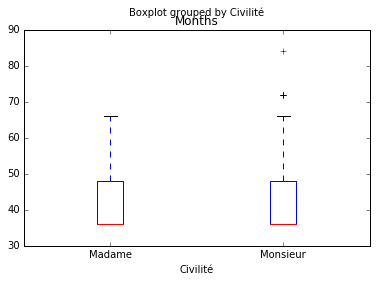

In [144]:
graduated_grouped = graduated_students.groupby(graduated_students.Civilité)
print(graduated_grouped['Months'].mean())
print(graduated_grouped['Months'].describe()) #we see that average number of months is bigger for male than for female
                                              #on the other hand, when we apply robust statistic we see that number of months
                                              #considering 50% of population is equal for male and female. we conclude that 
                                              #average value for male is only bigger because there exist "bigger" outliers (max=84 months)
                                              #therefore, there are no statisticaly significant differences
bp = graduated_students.boxplot(column='Months', by='Civilité', grid=False)
for i in ['Madame', 'Monsieur']:
    y = graduated_students.Months[graduated_students.Civilité==i]
    x = np.random.normal(0, 0.04, size=len(y))
    plt.plot(x, y, alpha=0.2)

In [ ]:
sem_1 = 'Bachelor semestre 1'
sem_5 = 'Bachelor semestre 5'
sem_6 = 'Bachelor semestre 6'
bachelor_sem1 = pd.DataFrame()
bachelor_sem5 = pd.DataFrame()
bachelor_sem6 = pd.DataFrame()
for y in years:
    
    with_years = bachelor_datasets[y][sem_1].copy()
    with_years['Years'] = pd.Series([y]*with_years.shape[0], index=with_years.index)
    bachelor_sem1=bachelor_sem1.append(with_years)
    
    with_years = bachelor_datasets[y][sem_5].copy()
    with_years['Years'] = pd.Series([y]*with_years.shape[0], index=with_years.index)
    bachelor_sem5=bachelor_sem5.append(with_years)
                             
    with_years = bachelor_datasets[y][sem_6].copy()
    with_years['Years'] = pd.Series([y]*with_years.shape[0], index=with_years.index)
    bachelor_sem6=bachelor_sem6.append(with_years) 
                             
graduated_students = pd.DataFrame()
for index, row in bachelor_sem1.iterrows():
    if bachelor_sem5['No Sciper'].isin([row['No Sciper']]).values.any() & bachelor_sem6['No Sciper'].isin([row['No Sciper']]).values.any():
        graduated_students=graduated_students.append(row)
del (graduated_students['Years'])
print (graduated_students.head())